### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import os

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
train = pd.read_csv("Data2/Train.csv")
test = pd.read_csv("Data2/Test.csv")

In [4]:
train.head()

OrderNo        UserId VehicleType  PlatformType PersonalorBusiness  Placement-DayofMonth  Placement-Weekday(Mo=1) Placement-Time  Confirmation-DayofMonth  Confirmation-Weekday(Mo=1) Confirmation-Time  ArrivalatPickup-DayofMonth  ArrivalatPickup-Weekday(Mo=1) ArrivalatPickup-Time  Pickup-DayofMonth  Pickup-Weekday(Mo=1)  Pickup-Time  ArrivalatDestination-DayofMonth  ArrivalatDestination-Weekday(Mo=1) ArrivalatDestination-Time  Distance(KM)  Temperature  Precipitationinmillimeters  PickupLat  PickupLong  DestinationLat  DestinationLong       RiderId  TimefromPickuptoArrival
0   Order_No_4211   User_Id_633        Bike             3           Business                     9                        5     9:35:46 AM                        9                           5        9:40:10 AM                           9                              5          10:04:47 AM                  9                     5  10:27:30 AM                                9                                   5               10:39:55 AM             4         20.4                         NaN  -1.317755   36.830370       -1.300406        36.829741  Rider_Id_432                      745
1  Order_No_25375  User_Id_2285        Bike             3           Personal                    12                        5    11:16:16 AM                       12                           5       11:23:21 AM                          12                              5          11:40:22 AM                 12                     5  11:44:09 AM                               12                                   5               12:17:22 PM            16         26.4                         NaN  -1.351453   36.899315       -1.295004        36.814358  Rider_Id_856                     1993
2   Order_No_1899   User_Id_265        Bike             3           Business                    30                        2    12:39:25 PM                       30                           2       12:42:44 PM                          30                              2          12:49:34 PM                 30                     2  12:53:03 PM                               30                                   2                1:00:38 PM             3          NaN                         NaN  -1.308284   36.843419       -1.300921        36.828195  Rider_Id_155                      455
3   Order_No_9336  User_Id_1402        Bike             3           Business                    15                        5     9:25:34 AM                       15                           5        9:26:05 AM                          15                              5           9:37:56 AM                 15                     5   9:43:06 AM                               15                                   5               10:05:27 AM             9         19.2                         NaN  -1.281301   36.832396       -1.257147        36.795063  Rider_Id_855                     1341
4  Order_No_27883  User_Id_1737        Bike             1           Personal                    13                        1     9:55:18 AM                       13                           1        9:56:18 AM                          13                              1          10:03:53 AM                 13                     1  10:05:23 AM                               13                                   1               10:25:37 AM             9         15.4                         NaN  -1.266597   36.792118       -1.295041        36.809817  Rider_Id_770                     1214

In [5]:
test.head()

OrderNo        UserId VehicleType  PlatformType PersonalorBusiness  Placement-DayofMonth  Placement-Weekday(Mo=1) Placement-Time  Confirmation-DayofMonth  Confirmation-Weekday(Mo=1) Confirmation-Time  ArrivalatPickup-DayofMonth  ArrivalatPickup-Weekday(Mo=1) ArrivalatPickup-Time  Pickup-DayofMonth  Pickup-Weekday(Mo=1)  Pickup-Time  Distance(KM)  Temperature  Precipitationinmillimeters  PickupLat  PickupLong  DestinationLat  DestinationLong       RiderId  TimefromPickuptoArrival
0  Order_No_19248  User_Id_3355        Bike             3           Business                    27                        3     4:44:10 PM                       27                           3        4:44:29 PM                          27                              3           4:53:04 PM                 27                     3   5:06:47 PM             8          NaN                         NaN  -1.333275   36.870815       -1.305249        36.822390  Rider_Id_192                      NaN
1  Order_No_12736  User_Id_3647        Bike             3           Business                    17                        5    12:57:35 PM                       17                           5       12:59:17 PM                          17                              5           1:20:27 PM                 17                     5   1:25:37 PM             5          NaN                         NaN  -1.272639   36.794723       -1.277007        36.823907  Rider_Id_868                      NaN
2    Order_No_768  User_Id_2154        Bike             3           Business                    27                        4    11:08:14 AM                       27                           4       11:25:05 AM                          27                              4          11:33:20 AM                 27                     4  11:57:54 AM             5         22.8                         NaN  -1.290894   36.822971       -1.276574        36.851365   Rider_Id_26                      NaN
3  Order_No_15332  User_Id_2910        Bike             3           Business                    17                        1     1:51:35 PM                       17                           1        1:53:27 PM                          17                              1           2:02:41 PM                 17                     1   2:16:52 PM             5         24.5                         NaN  -1.290503   36.809646       -1.303382        36.790658  Rider_Id_685                      NaN
4  Order_No_21373  User_Id_1205        Bike             3           Business                    11                        2    11:30:28 AM                       11                           2       11:34:45 AM                          11                              2          11:47:19 AM                 11                     2  11:56:04 AM             6         24.4                         NaN  -1.281081   36.814423       -1.266467        36.792161  Rider_Id_858                      NaN

In [6]:
train.drop(["UserId", 
            "ArrivalatDestination-Weekday(Mo=1)",
            "ArrivalatDestination-Time", 
            "ArrivalatDestination-DayofMonth",
            "RiderId"], axis=1, inplace=True)

In [7]:
test.drop(["UserId","RiderId"], axis=1, inplace=True)

In [8]:
train.columns.values

array(['OrderNo', 'VehicleType', 'PlatformType', 'PersonalorBusiness',
       'Placement-DayofMonth', 'Placement-Weekday(Mo=1)',
       'Placement-Time', 'Confirmation-DayofMonth',
       'Confirmation-Weekday(Mo=1)', 'Confirmation-Time',
       'ArrivalatPickup-DayofMonth', 'ArrivalatPickup-Weekday(Mo=1)',
       'ArrivalatPickup-Time', 'Pickup-DayofMonth',
       'Pickup-Weekday(Mo=1)', 'Pickup-Time', 'Distance(KM)',
       'Temperature', 'Precipitationinmillimeters', 'PickupLat',
       'PickupLong', 'DestinationLat', 'DestinationLong',
       'TimefromPickuptoArrival'], dtype=object)

In [9]:
test.columns.values

array(['OrderNo', 'VehicleType', 'PlatformType', 'PersonalorBusiness',
       'Placement-DayofMonth', 'Placement-Weekday(Mo=1)',
       'Placement-Time', 'Confirmation-DayofMonth',
       'Confirmation-Weekday(Mo=1)', 'Confirmation-Time',
       'ArrivalatPickup-DayofMonth', 'ArrivalatPickup-Weekday(Mo=1)',
       'ArrivalatPickup-Time', 'Pickup-DayofMonth',
       'Pickup-Weekday(Mo=1)', 'Pickup-Time', 'Distance(KM)',
       'Temperature', 'Precipitationinmillimeters', 'PickupLat',
       'PickupLong', 'DestinationLat', 'DestinationLong',
       'TimefromPickuptoArrival'], dtype=object)

In [10]:
# Checking the data types of all the columns
train.dtypes

OrderNo                           object
VehicleType                       object
PlatformType                       int64
PersonalorBusiness                object
Placement-DayofMonth               int64
Placement-Weekday(Mo=1)            int64
Placement-Time                    object
Confirmation-DayofMonth            int64
Confirmation-Weekday(Mo=1)         int64
Confirmation-Time                 object
ArrivalatPickup-DayofMonth         int64
ArrivalatPickup-Weekday(Mo=1)      int64
ArrivalatPickup-Time              object
Pickup-DayofMonth                  int64
Pickup-Weekday(Mo=1)               int64
Pickup-Time                       object
Distance(KM)                       int64
Temperature                      float64
Precipitationinmillimeters       float64
PickupLat                        float64
PickupLong                       float64
DestinationLat                   float64
DestinationLong                  float64
TimefromPickuptoArrival            int64
dtype: object

In [11]:
train.isnull().sum()

OrderNo                              0
VehicleType                          0
PlatformType                         0
PersonalorBusiness                   0
Placement-DayofMonth                 0
Placement-Weekday(Mo=1)              0
Placement-Time                       0
Confirmation-DayofMonth              0
Confirmation-Weekday(Mo=1)           0
Confirmation-Time                    0
ArrivalatPickup-DayofMonth           0
ArrivalatPickup-Weekday(Mo=1)        0
ArrivalatPickup-Time                 0
Pickup-DayofMonth                    0
Pickup-Weekday(Mo=1)                 0
Pickup-Time                          0
Distance(KM)                         0
Temperature                       4366
Precipitationinmillimeters       20649
PickupLat                            0
PickupLong                           0
DestinationLat                       0
DestinationLong                      0
TimefromPickuptoArrival              0
dtype: int64

#### Replace Nan values with mean

In [12]:
train['Temperature'] = train['Temperature'].fillna((train['Temperature'].mean()))
train['Precipitationinmillimeters'] = train['Precipitationinmillimeters'].fillna((train['Precipitationinmillimeters'].mean()))

In [13]:
train.isnull().sum()

OrderNo                          0
VehicleType                      0
PlatformType                     0
PersonalorBusiness               0
Placement-DayofMonth             0
Placement-Weekday(Mo=1)          0
Placement-Time                   0
Confirmation-DayofMonth          0
Confirmation-Weekday(Mo=1)       0
Confirmation-Time                0
ArrivalatPickup-DayofMonth       0
ArrivalatPickup-Weekday(Mo=1)    0
ArrivalatPickup-Time             0
Pickup-DayofMonth                0
Pickup-Weekday(Mo=1)             0
Pickup-Time                      0
Distance(KM)                     0
Temperature                      0
Precipitationinmillimeters       0
PickupLat                        0
PickupLong                       0
DestinationLat                   0
DestinationLong                  0
TimefromPickuptoArrival          0
dtype: int64

In [14]:
train.head()

OrderNo VehicleType  PlatformType PersonalorBusiness  Placement-DayofMonth  Placement-Weekday(Mo=1) Placement-Time  Confirmation-DayofMonth  Confirmation-Weekday(Mo=1) Confirmation-Time  ArrivalatPickup-DayofMonth  ArrivalatPickup-Weekday(Mo=1) ArrivalatPickup-Time  Pickup-DayofMonth  Pickup-Weekday(Mo=1)  Pickup-Time  Distance(KM)  Temperature  Precipitationinmillimeters  PickupLat  PickupLong  DestinationLat  DestinationLong  TimefromPickuptoArrival
0   Order_No_4211        Bike             3           Business                     9                        5     9:35:46 AM                        9                           5        9:40:10 AM                           9                              5          10:04:47 AM                  9                     5  10:27:30 AM             4    20.400000                    7.905797  -1.317755   36.830370       -1.300406        36.829741                      745
1  Order_No_25375        Bike             3           Personal                    12                        5    11:16:16 AM                       12                           5       11:23:21 AM                          12                              5          11:40:22 AM                 12                     5  11:44:09 AM            16    26.400000                    7.905797  -1.351453   36.899315       -1.295004        36.814358                     1993
2   Order_No_1899        Bike             3           Business                    30                        2    12:39:25 PM                       30                           2       12:42:44 PM                          30                              2          12:49:34 PM                 30                     2  12:53:03 PM             3    23.258889                    7.905797  -1.308284   36.843419       -1.300921        36.828195                      455
3   Order_No_9336        Bike             3           Business                    15                        5     9:25:34 AM                       15                           5        9:26:05 AM                          15                              5           9:37:56 AM                 15                     5   9:43:06 AM             9    19.200000                    7.905797  -1.281301   36.832396       -1.257147        36.795063                     1341
4  Order_No_27883        Bike             1           Personal                    13                        1     9:55:18 AM                       13                           1        9:56:18 AM                          13                              1          10:03:53 AM                 13                     1  10:05:23 AM             9    15.400000                    7.905797  -1.266597   36.792118       -1.295041        36.809817                     1214

## *Data Exploration*

In [15]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [16]:
train['TimefromPickuptoArrival'].describe()

count    21201.000000
mean      1556.920947
std        987.270788
min          1.000000
25%        882.000000
50%       1369.000000
75%       2040.000000
max       7883.000000
Name: TimefromPickuptoArrival, dtype: float64

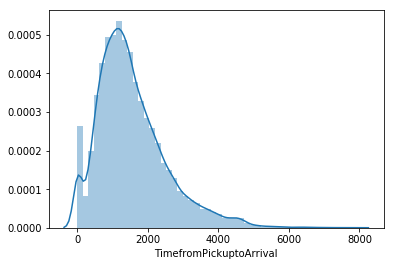

In [17]:
sns.distplot(train['TimefromPickuptoArrival'])

In [18]:
print("Skewness: %f" % train['TimefromPickuptoArrival'].skew())
print("Kurtosis: %f" % train['TimefromPickuptoArrival'].kurt())

Skewness: 1.201938
Kurtosis: 2.236352


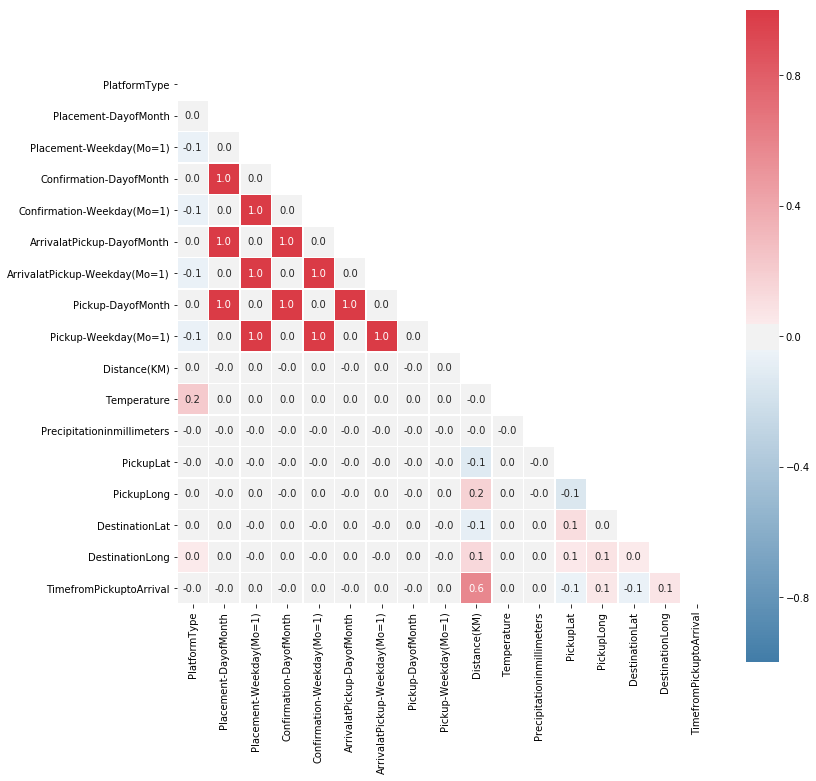

In [19]:
corr = train.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(12, 12))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
sns.heatmap(corr, mask=mask, square=True, annot=True, fmt='.1f', cmap=cmap, vmin=-1, center=0, linewidths=.5)
plt.show()

#### Onehot encoding

In [20]:
def LabelEncord_categorical(df):
    categorical_params = ["VehicleType","PersonalorBusiness"]
    for params in categorical_params:
        le = LabelEncoder()
        df[params] = le.fit_transform(df[params])
    return df

def to_date_time(df):
    col_parameters = ["Placement-Time","Confirmation-Time","ArrivalatPickup-Time","Pickup-Time"]
    for params in col_parameters:
        df[params] = pd.to_datetime(df[params])
        df[params] = (pd.to_timedelta(df[params].dt.strftime('%H:%M:%S')).dt.total_seconds().astype(int))
    return df


def pre_processing(df):
    df = LabelEncord_categorical(df)
    df = to_date_time(df)
    return df

In [26]:
train = pre_processing(train)

In [27]:
test = pre_processing(test)

In [28]:
train.head()

OrderNo  VehicleType  PlatformType  PersonalorBusiness  Placement-DayofMonth  Placement-Weekday(Mo=1)  Placement-Time  Confirmation-DayofMonth  Confirmation-Weekday(Mo=1)  Confirmation-Time  ArrivalatPickup-DayofMonth  ArrivalatPickup-Weekday(Mo=1)  ArrivalatPickup-Time  Pickup-DayofMonth  Pickup-Weekday(Mo=1)  Pickup-Time  Distance(KM)  Temperature  Precipitationinmillimeters  PickupLat  PickupLong  DestinationLat  DestinationLong  TimefromPickuptoArrival
0   Order_No_4211            0             3                   0                     9                        5               0                        9                           5                  0                           9                              5                     0                  9                     5            0             4    20.400000                    7.905797  -1.317755   36.830370       -1.300406        36.829741                      745
1  Order_No_25375            0             3                   1                    12                        5               0                       12                           5                  0                          12                              5                     0                 12                     5            0            16    26.400000                    7.905797  -1.351453   36.899315       -1.295004        36.814358                     1993
2   Order_No_1899            0             3                   0                    30                        2               0                       30                           2                  0                          30                              2                     0                 30                     2            0             3    23.258889                    7.905797  -1.308284   36.843419       -1.300921        36.828195                      455
3   Order_No_9336            0             3                   0                    15                        5               0                       15                           5                  0                          15                              5                     0                 15                     5            0             9    19.200000                    7.905797  -1.281301   36.832396       -1.257147        36.795063                     1341
4  Order_No_27883            0             1                   1                    13                        1               0                       13                           1                  0                          13                              1                     0                 13                     1            0             9    15.400000                    7.905797  -1.266597   36.792118       -1.295041        36.809817                     1214

In [29]:
test.head()

OrderNo  VehicleType  PlatformType  PersonalorBusiness  Placement-DayofMonth  Placement-Weekday(Mo=1)  Placement-Time  Confirmation-DayofMonth  Confirmation-Weekday(Mo=1)  Confirmation-Time  ArrivalatPickup-DayofMonth  ArrivalatPickup-Weekday(Mo=1)  ArrivalatPickup-Time  Pickup-DayofMonth  Pickup-Weekday(Mo=1)  Pickup-Time  Distance(KM)  Temperature  Precipitationinmillimeters  PickupLat  PickupLong  DestinationLat  DestinationLong  TimefromPickuptoArrival
0  Order_No_19248            0             3                   0                    27                        3               0                       27                           3                  0                          27                              3                     0                 27                     3            0             8          NaN                         NaN  -1.333275   36.870815       -1.305249        36.822390                      NaN
1  Order_No_12736            0             3                   0                    17                        5               0                       17                           5                  0                          17                              5                     0                 17                     5            0             5          NaN                         NaN  -1.272639   36.794723       -1.277007        36.823907                      NaN
2    Order_No_768            0             3                   0                    27                        4               0                       27                           4                  0                          27                              4                     0                 27                     4            0             5         22.8                         NaN  -1.290894   36.822971       -1.276574        36.851365                      NaN
3  Order_No_15332            0             3                   0                    17                        1               0                       17                           1                  0                          17                              1                     0                 17                     1            0             5         24.5                         NaN  -1.290503   36.809646       -1.303382        36.790658                      NaN
4  Order_No_21373            0             3                   0                    11                        2               0                       11                           2                  0                          11                              2                     0                 11                     2            0             6         24.4                         NaN  -1.281081   36.814423       -1.266467        36.792161                      NaN

In [30]:
#list(train)

# Model: RandomForestRegressor

In [31]:
from sklearn.model_selection import cross_val_score,cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [32]:
X = train.drop(["TimefromPickuptoArrival","OrderNo"],axis=1)
y = train["TimefromPickuptoArrival"]

In [33]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [34]:
rf_model = RandomForestRegressor(random_state=1)

In [35]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [36]:
predicted = rf_model.predict(X_test)

In [38]:
rmse = np.sqrt(mean_squared_error(y_test,predicted))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 847.5109965451262


## With GridSearch

In [39]:
gsc = GridSearchCV(estimator=RandomForestRegressor(),
                   param_grid = {'max_depth': range(3,7),'n_estimators': (10, 50, 100, 1000),},
                   cv=5,
                   scoring='neg_mean_squared_error',
                   verbose=0,
                   n_jobs=-1)
    
grid_result = gsc.fit(X, y)
best_params = grid_result.best_params_

In [40]:
rfr = RandomForestRegressor(max_depth=best_params["max_depth"],
                            n_estimators=best_params["n_estimators"],
                            random_state=False,
                            verbose=False)   
 

In [41]:
scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

In [ ]:
predictions = cross_val_predict(rfr, X, y, cv=10)

In [ ]:
rmse = np.sqrt(mean_squared_error(y,predictions))
print("Root Mean Squared Error:", rmse)

# Model: XGBRegressor

In [ ]:
# Create training predictors data
train_X = train[predictor_cols]
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import plot_importance


xgb = XGBRegressor(n=1500)
xgb.fit(train_X, train_y, verbose=False)

In [ ]:
# Read the test data
#test = pd.read_csv('../input/test.csv')
# Treat the test data in the same way as training data. In this case, pull same columns.
test_X = test[predictor_cols]
#model=Lasso(alpha =0.001, random_state=1)

#model.fit(train_X,train_y)

#pred=model.predict(test_X)
#print(pred)
# Use the model to make predictions
xgb_predictions = xgb.predict(test_X)
# We will look at the predicted prices to ensure we have something sensible.
print(predicted_prices)

In [ ]:
rmse = np.sqrt(mean_squared_error(y,xgb_predictions))
print("XGB Root Mean Squared Error:", rmse)

In [ ]:
# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_predictions.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.xgb_predictions)))

In [ ]:
plot_importance(xgb, max_num_features=10)

## Grid Search with XGBoost

Let’s take our parameter tuning to the next level by using scikit-learn’s GridSearch and RandomizedSearch capabilities with internal cross-validation using the GridSearchCV and RandomizedSearchCV functions. 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
# A parameter grid for XGBoost
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}

# Initialize XGB and GridSearch
xgb = XGBRegressor(nthread=-1) 

grid = GridSearchCV(xgb, params)
grid.fit(X, Y)


In [ ]:
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [10, 50, 100, 1000],
    'max_depth': [2, 7]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm, 
                        param_grid=gbm_param_grid,
                        scoring='neg_mean_squared_error', 
                        cv=4,
                        n_jobs = -1,
                        verbose=1)

grid_mse.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

## Random Search with XGBoost

Often, GridSearchCV can be really time consuming, so in practice, we may want to use RandomizedSearchCV instead.

In [ ]:
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': range(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator=gbm, 
                                    scoring="neg_mean_squared_error", 
                                    n_iter=5, 
                                    cv=4, 
                                    n_jobs = -1,
                                    verbose=1)

# Fit randomized_mse to the data
randomized_mse.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

## Submission

In [ ]:
#my_submission = pd.DataFrame({'OrderNo': test.OrderNo, 'TimefromPickuptoArrival': predicted_prices_2})
# you could use any filename. We choose submission here
#my_submission.to_csv('submission2.csv', index=False)